In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
from scipy import signal
from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid

In [2]:
box = 140
obj = np.load('obj.npy')
obj = obj[0,:,:]+1j*obj[1,:,:]
middley = int(obj.shape[0]/2)
middlex = int(obj.shape[1]/2)
obj = obj[(middley-box):(middley+box),(middlex-box):(middlex+box)]
scan_pos = np.load("scan_pos.npy")[0]-(middley-box)
disp_val = np.load("disp_value.npy")[0]

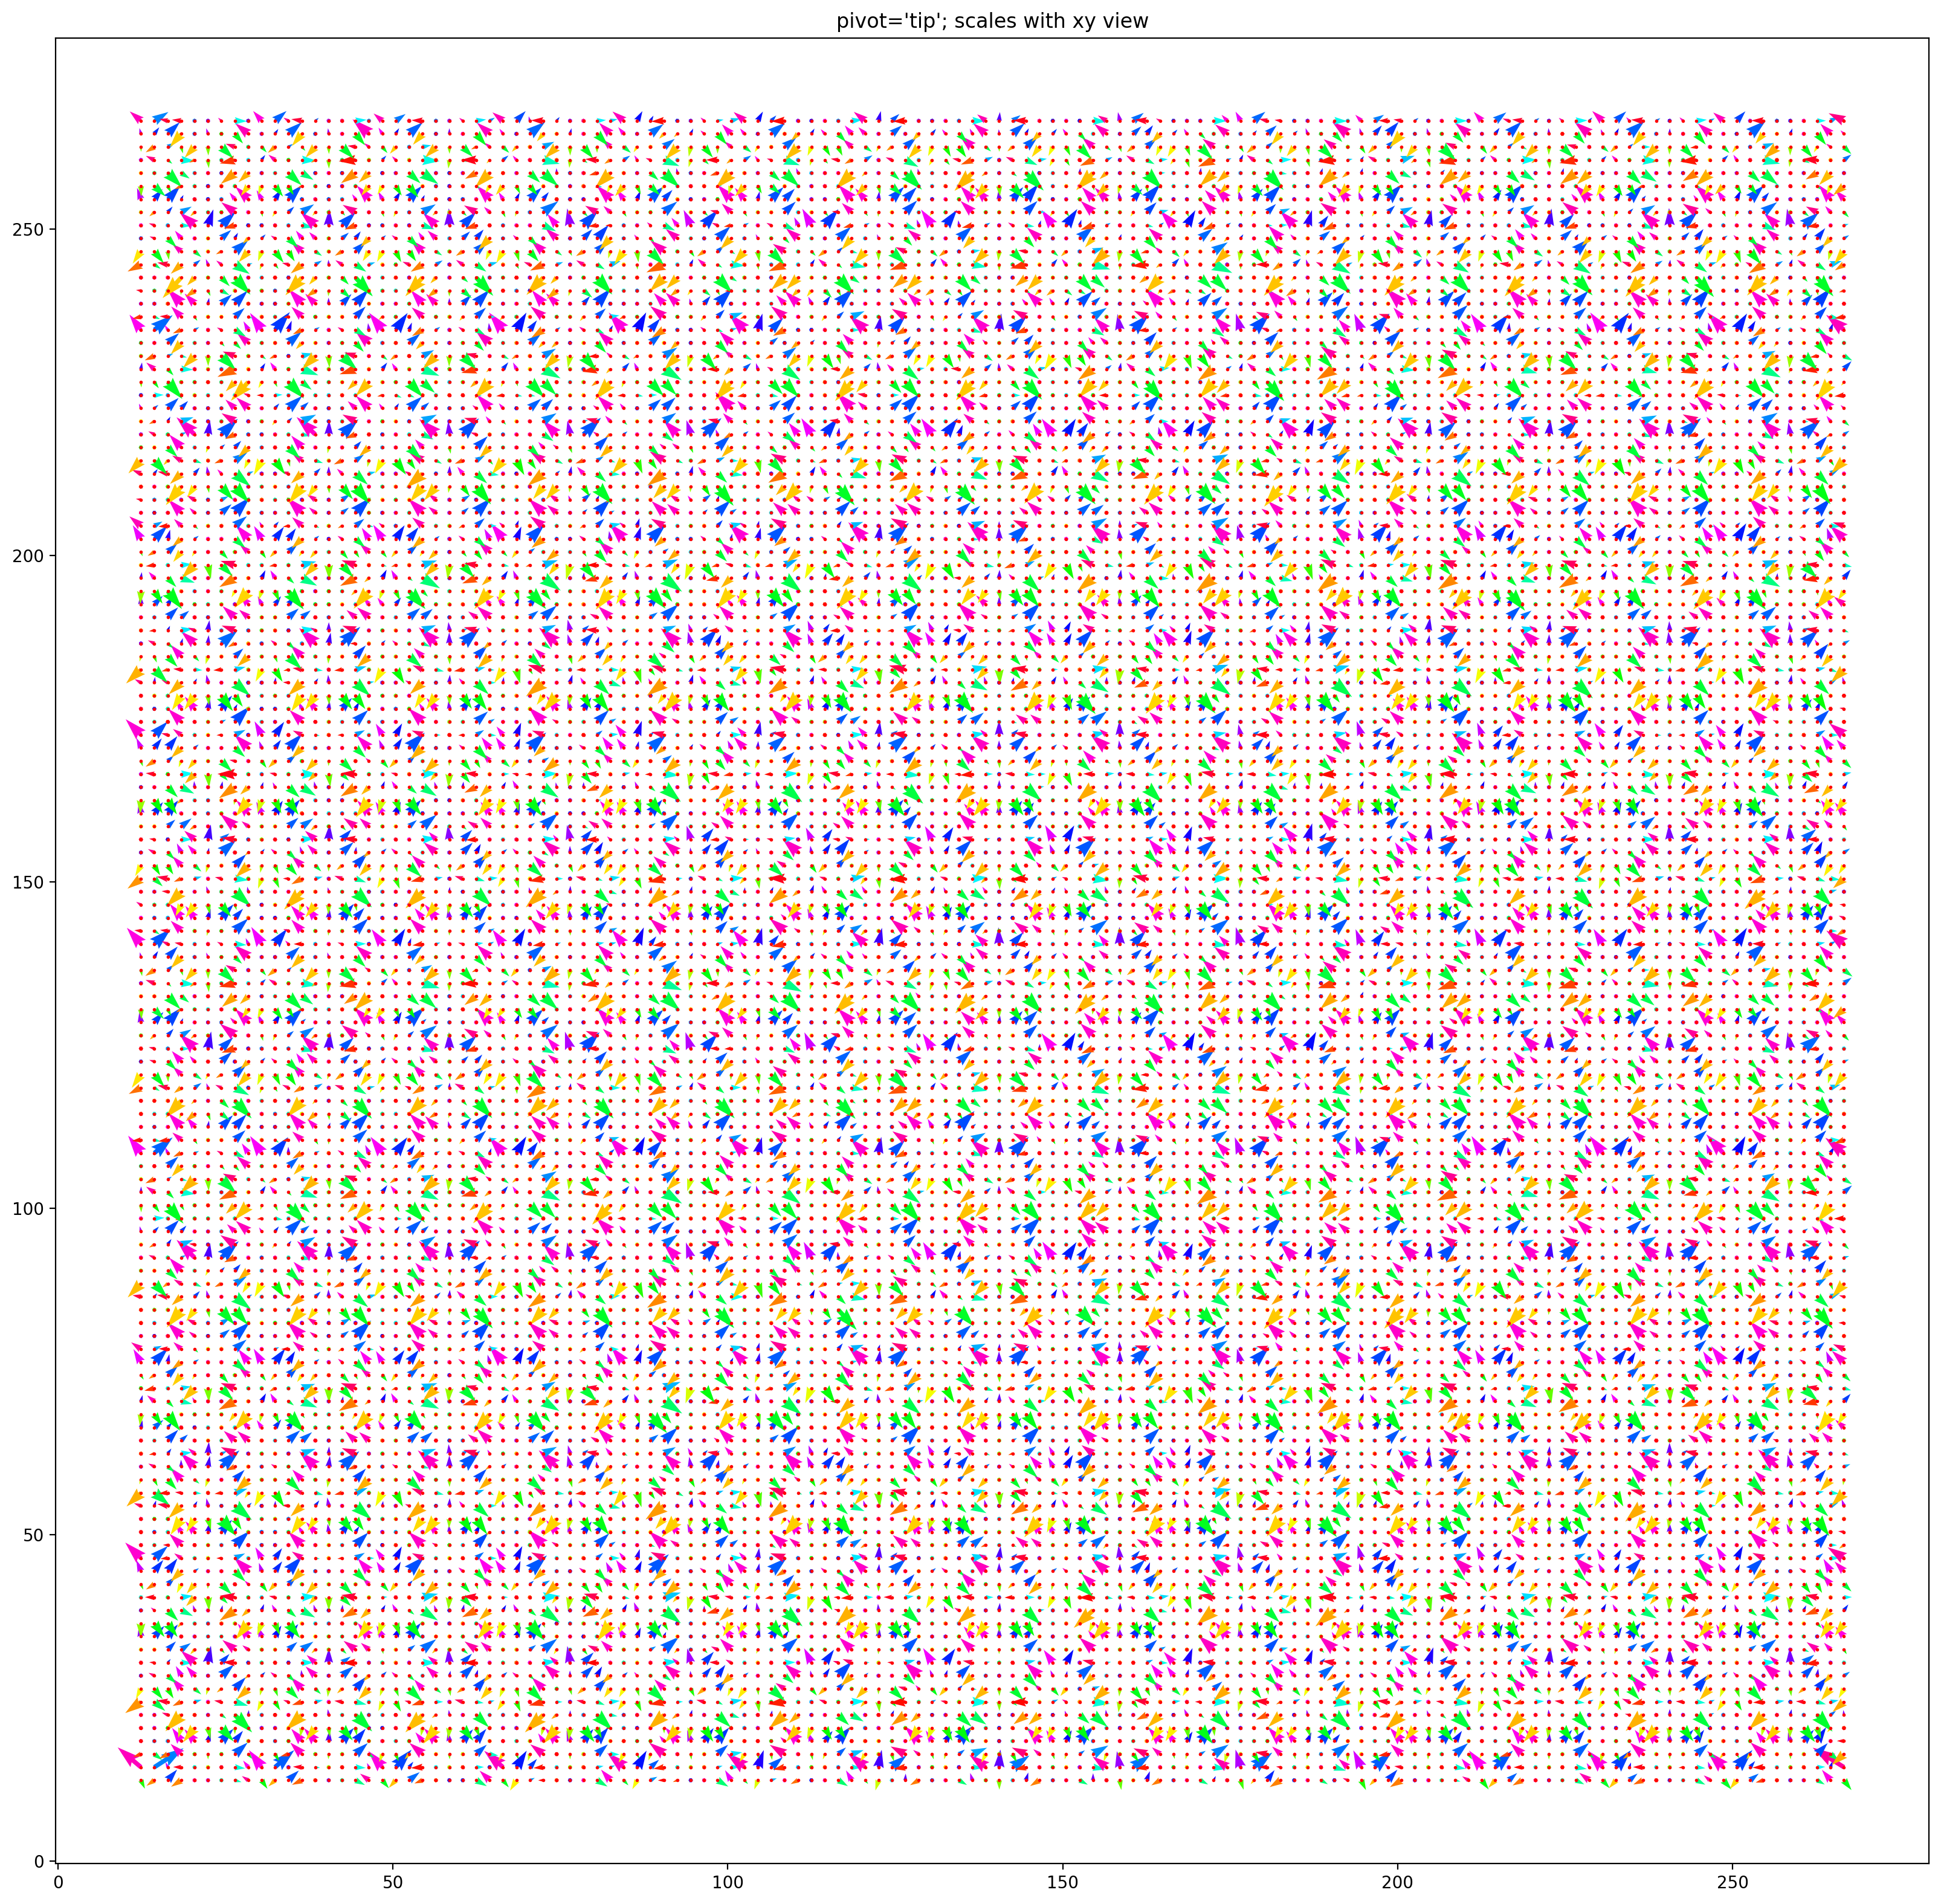

In [3]:
#visualize the displacment field.
plt.rcParams["figure.figsize"] = (20,20)
plt.rcParams["figure.dpi"] = 200
fig1, ax1 = plt.subplots()
ax1.set_title("pivot='tip'; scales with xy view")
M = np.angle(disp_val[:,0] + 1j*disp_val[:,1])
Q = ax1.quiver(scan_pos[:,0], scan_pos[:,1], disp_val[:,0], disp_val[:,1], M, units='xy', pivot='tail',cmap=plt.cm.hsv)
qk = ax1.quiverkey(Q, 0.9, 0.9, 1.0, r'$1 \frac{m}{s}$', labelpos='E', coordinates='figure')
ax1.scatter(scan_pos[:,0], scan_pos[:,1], color='r', s=1)
#plt.imshow(np.angle(obj), cmap=plt.cm.gray)
plt.show()

In [4]:
pos_prev = np.ones((scan_pos.shape[0], 3), scan_pos.dtype)
pos_prev[:,0:2] = scan_pos
left = np.matmul(pos_prev.T, disp_val)
right = np.matmul(pos_prev.T, pos_prev)
A = np.matmul(np.linalg.inv(right), left)
constraint =  np.matmul(pos_prev, A)
#remove the middle shift, keep the middle unchanged
center = np.ones((1, 3), scan_pos.dtype)
center[0, 0:2] = np.average(scan_pos, axis = 0)
center_shift = np.matmul(center, A)
constraint -= center_shift

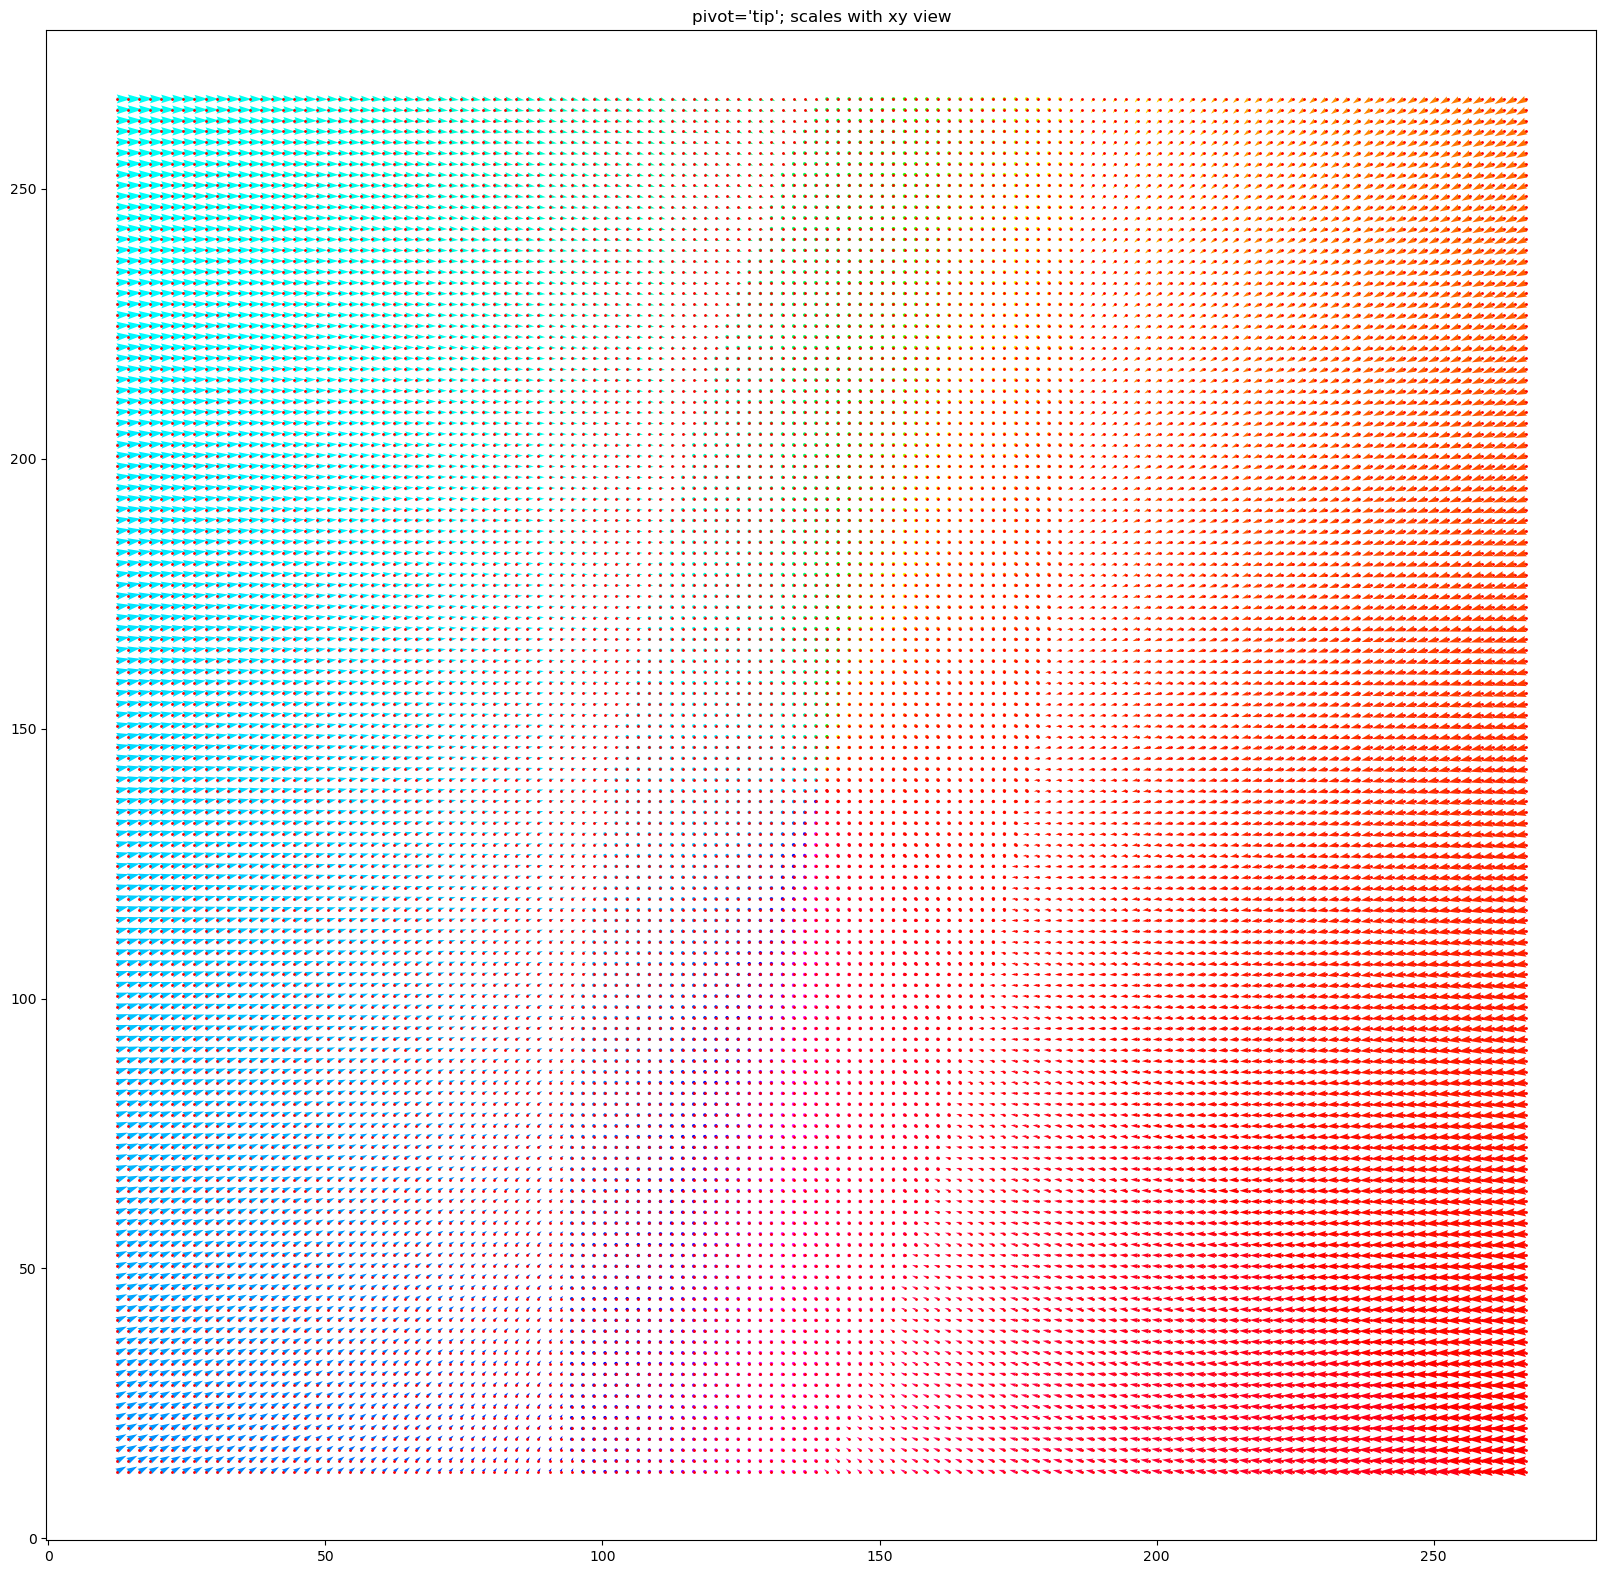

In [5]:
#plot the vector map.
plt.rcParams["figure.figsize"] = (20,20)
plt.rcParams["figure.dpi"] = 100
fig1, ax1 = plt.subplots()
ax1.set_title("pivot='tip'; scales with xy view")
M = np.angle(constraint[:,0]+ 1j*constraint[:,1])
Q = ax1.quiver(scan_pos[:,0], scan_pos[:,1], constraint[:,0], constraint[:,1], M, units='xy', pivot='tail',cmap=plt.cm.hsv)
qk = ax1.quiverkey(Q, 0.9, 0.9, 1, r'$1 \frac{m}{s}$', labelpos='E', coordinates='figure')
ax1.scatter(scan_pos[:,0],scan_pos[:,1], color='r', s=1)
#plt.imshow(np.angle(obj), cmap=plt.cm.gray)
plt.show()

In [6]:
#fit the displacement field distribution.


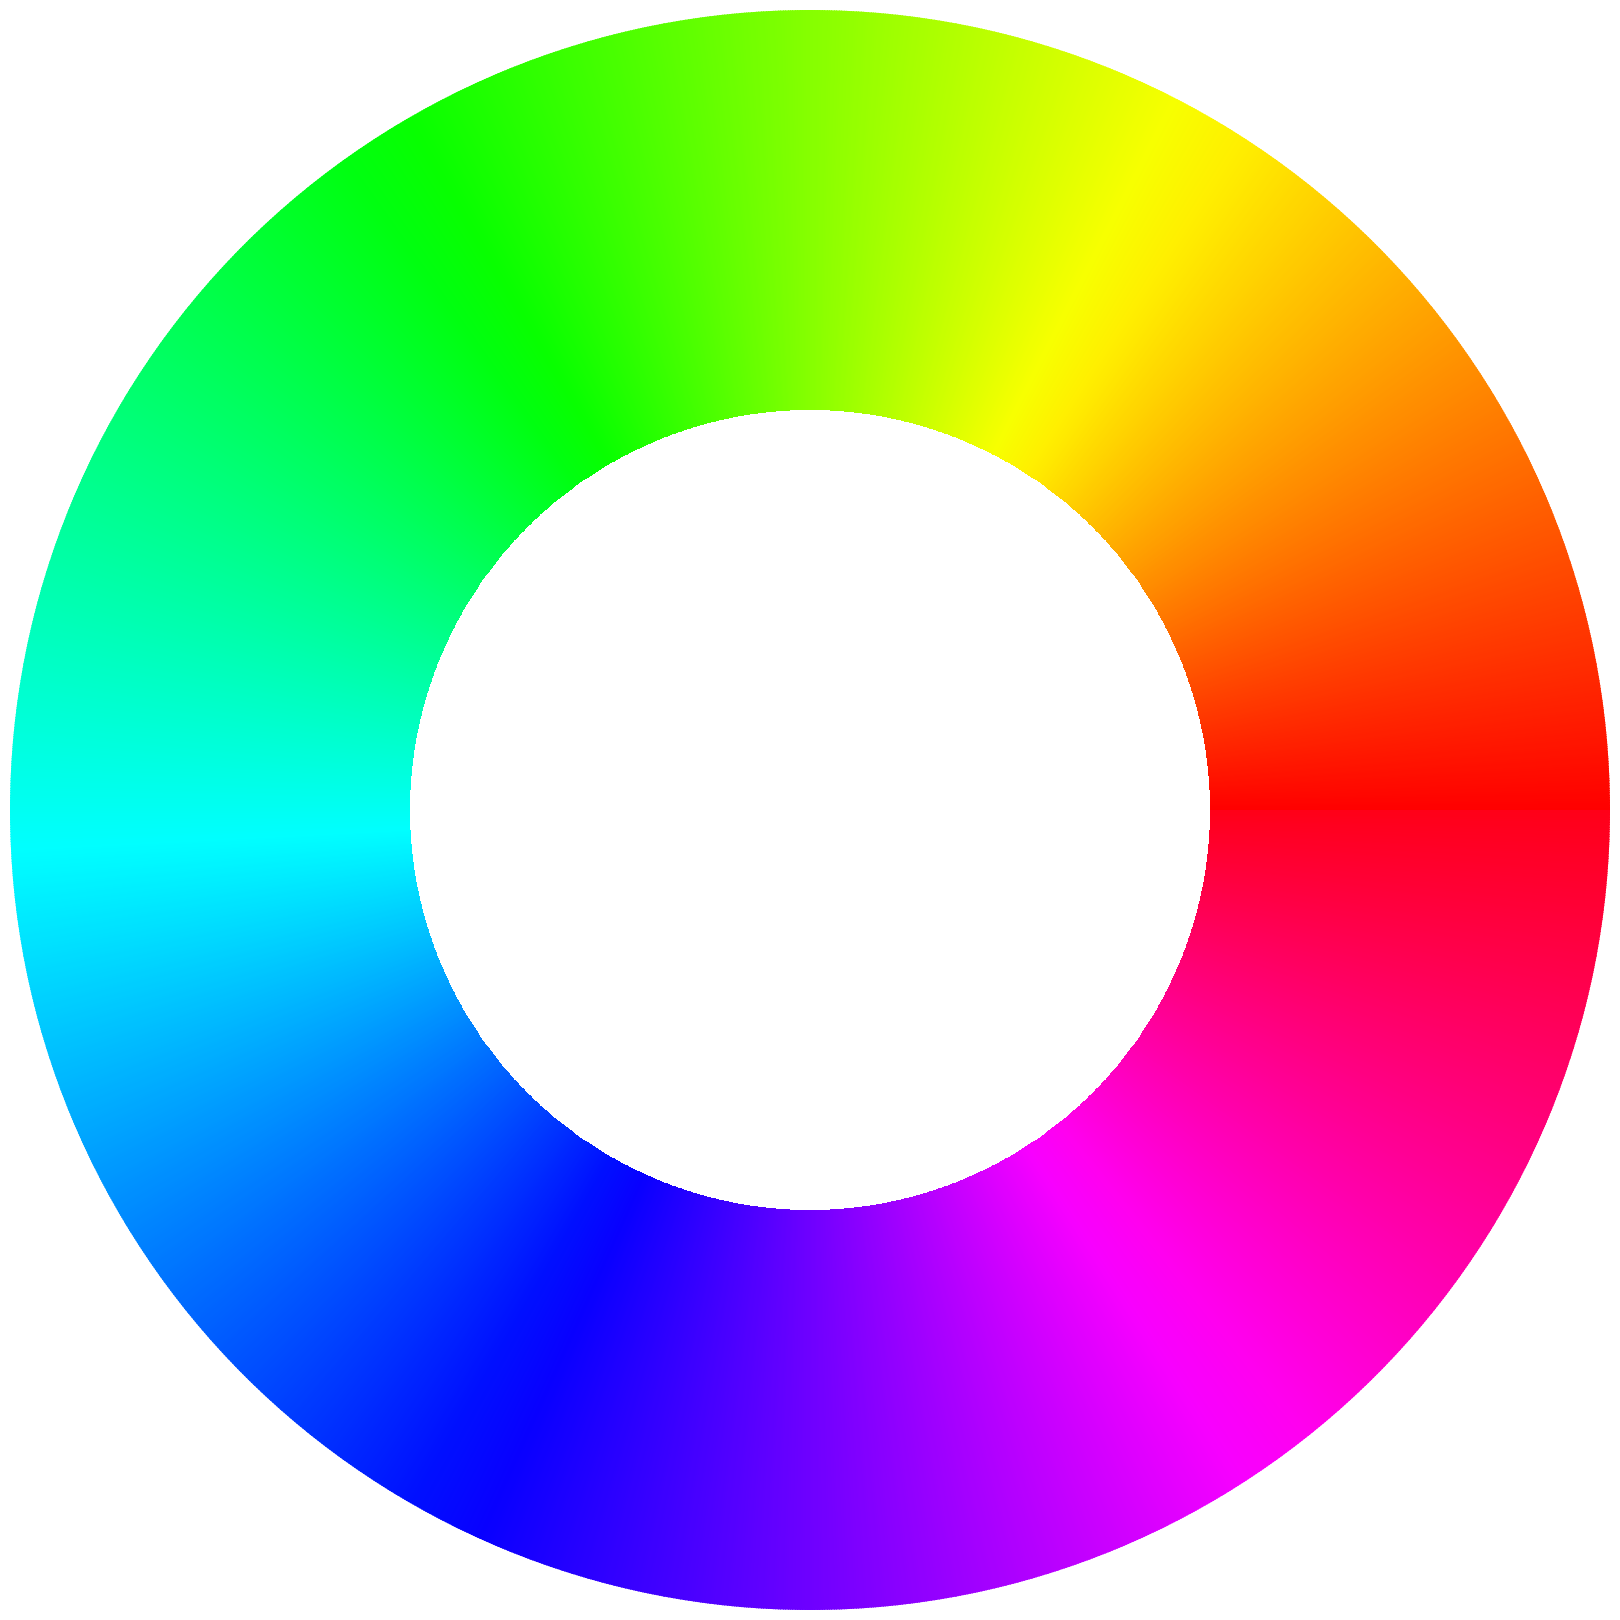

In [7]:
fig = plt.figure()
display_axes = fig.add_axes([0.1,0.1,0.8,0.8], projection='polar')
norm = mpl.colors.Normalize(0.0, 2*np.pi)
quant_steps = 2056.0
cb = mpl.colorbar.ColorbarBase(display_axes, cmap=cm.get_cmap('hsv',quant_steps), norm=norm, orientation='horizontal')
cb.outline.set_visible(False)                                 
display_axes.set_axis_off()
display_axes.set_rlim([-1,1])
plt.show() # Replace with plt.savefig if you want to save a file